In [3]:
import pandas as pd

houses = pd.read_csv("housing.csv")

print(houses)

       longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0           INLAND
20636    -121.21     39.49  ...             77100.0           INLAND
20637    -121.22     39.43  ...             92300.0           INLAND
20638    -121.32     39.43  ...             84700.0           INLAND
20639    -121.24     39.37  ...             89400.0           INLAND

[20640 rows x 10 columns]


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
houses.dropna(inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = houses.drop(['median_house_value'], axis = 1)
y = houses['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

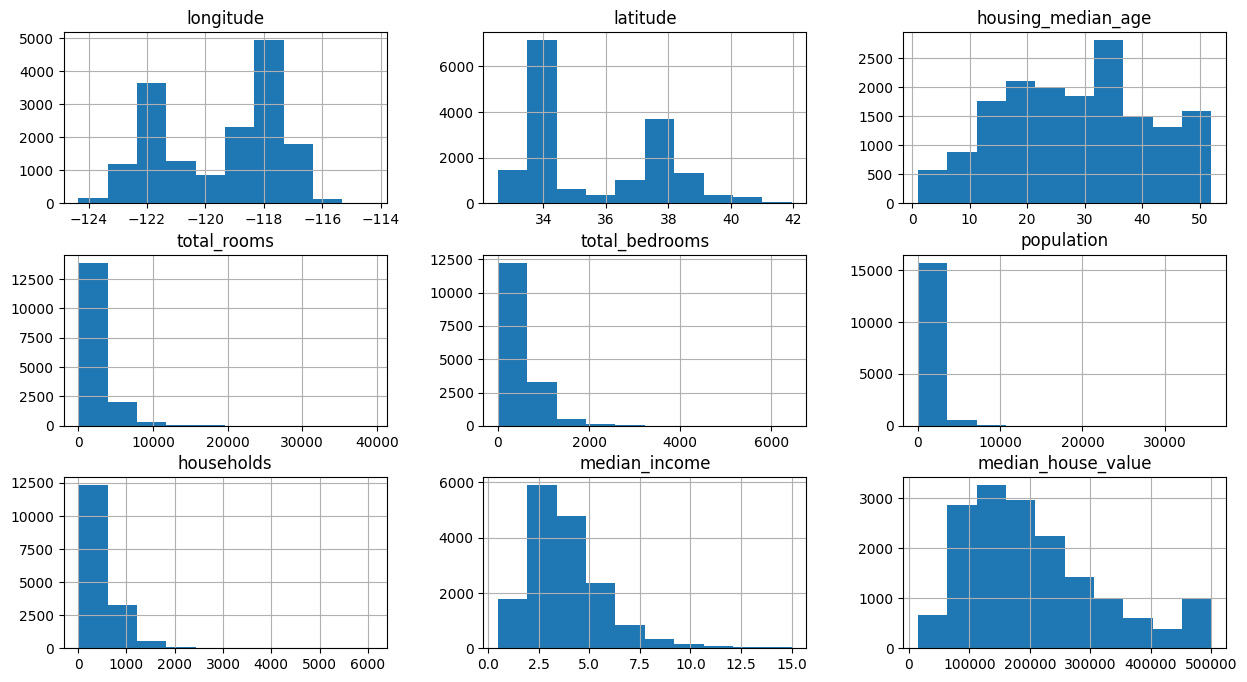

In [8]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15,8))

In [9]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

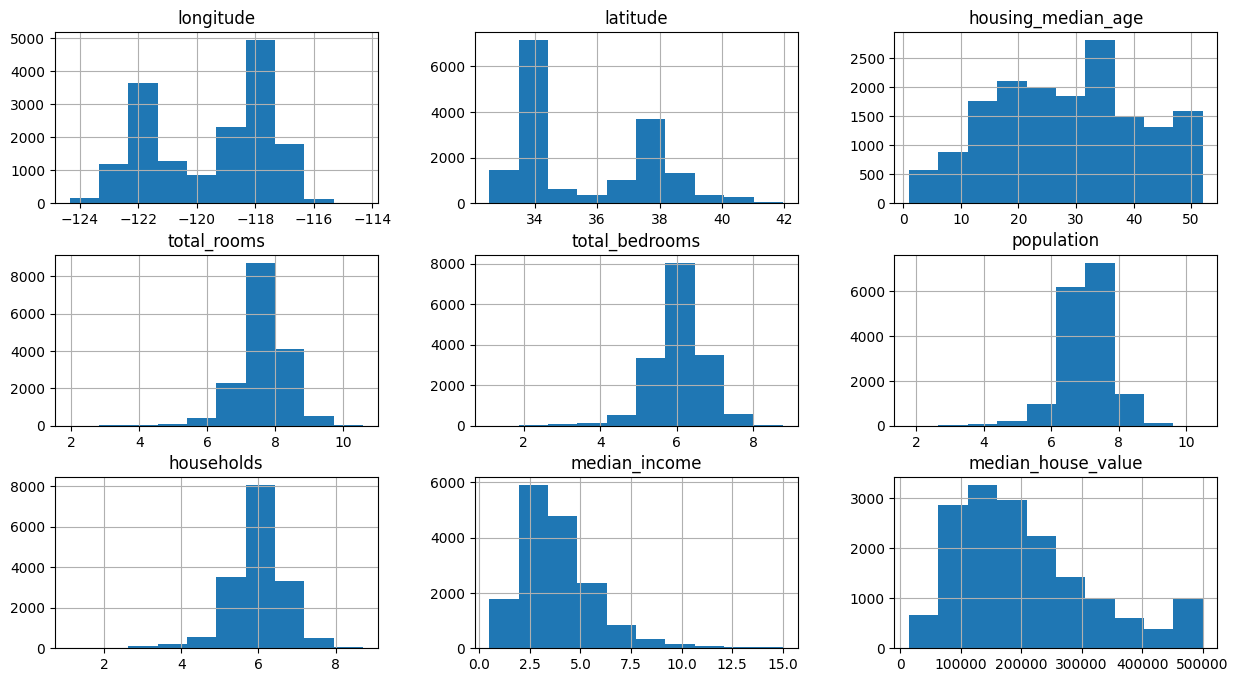

In [10]:
train_data.hist(figsize=(15,8))

In [11]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7237
INLAND        5108
NEAR OCEAN    2155
NEAR BAY      1842
ISLAND           4
Name: count, dtype: int64

In [12]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8021,-118.11,33.84,36.0,7.471363,5.697093,6.683361,5.662960,5.5581,218300.0,1,0,0,0,0
15647,-122.41,37.79,52.0,7.975908,6.747587,7.445418,6.722630,3.0296,500001.0,0,0,0,1,0
16660,-120.70,35.31,24.0,8.161946,6.257668,7.307202,6.228511,4.6719,337000.0,0,0,0,0,1
13818,-117.11,34.43,14.0,8.015327,6.322565,7.207860,6.186209,2.8021,111200.0,0,1,0,0,0
16235,-121.29,37.98,42.0,6.439350,4.969813,6.280396,5.075174,2.6250,65400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,-122.56,38.41,20.0,7.049255,5.356586,6.171701,5.214936,5.9300,384600.0,1,0,0,0,0
6182,-117.91,34.10,28.0,8.214736,6.583409,7.600902,6.577861,3.2813,181100.0,1,0,0,0,0
3741,-118.39,34.18,44.0,6.169611,4.521789,5.398163,4.727388,3.3906,223800.0,1,0,0,0,0
12276,-117.11,33.98,25.0,7.134891,5.746203,6.573680,5.710427,2.7344,149000.0,0,1,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

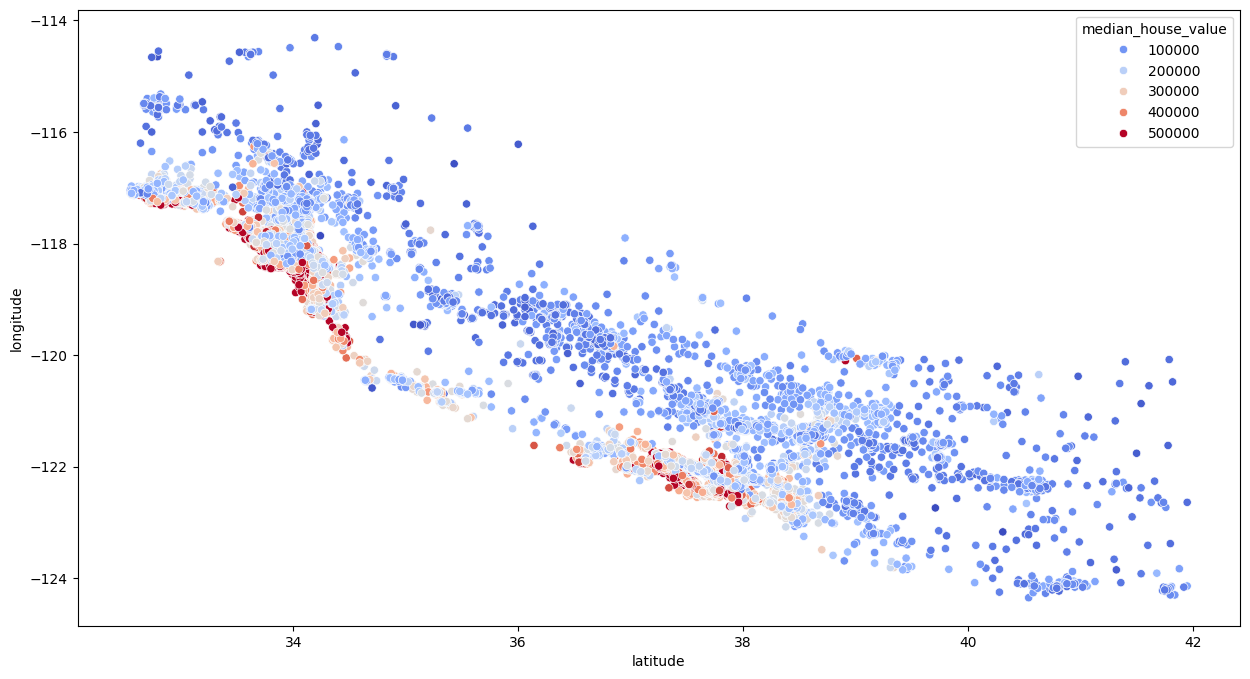

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data = train_data, hue = "median_house_value", palette="coolwarm")

In [14]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [15]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis = 1)



In [16]:
X_test, Y_test = test_data.drop(["median_house_value"], axis = 1), test_data["median_house_value"]


In [17]:
reg.score(X_test, y_test)

0.6653663576797562

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
forest.score(X_test, y_test)

0.810981152184393

In [20]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2, 4, 6, 8] 
}

grid_search = GridSearchCV(forest, param_grid, cv=  5, scoring="neg_mean_squared_error", 
                           return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
best_forest = grid_search.best_estimator_

In [23]:
best_forest.score(X_test, y_test)

0.8075649699284853